# Sentiment Analysis of Amazon Product Reviews Using RNN

## Introduction

In this notebook, we will explore and implement a Recurrent Neural Network (RNN) model for sentiment analysis on Amazon product reviews. Our primary goal is to build a robust RNN model to classify the sentiment of reviews into positive or negative categories. This process involves several key steps:

- **Data Loading and Preprocessing:** Importing the dataset, cleaning the text, tokenizing, and padding sequences.
- **Model Definition:** Constructing an RNN architecture tailored for sentiment classification tasks.
- **Model Training and Evaluation:** Training the RNN model on the review data and evaluating its performance using accuracy and other relevant metrics.
- **Parametric Tuning:** Fine-tuning the model’s parameters, including the number of RNN layers, units per layer, learning rate, and dropout rate, to optimize performance.
- **Performance Assessment:** Analyzing the model's performance through accuracy, precision, recall, and F1-score.

## Introduction of the Dataset

The dataset comprises over 568,000 consumer reviews collected from Amazon.com. It includes various attributes such as review text, ratings, and user information. The reviews provide detailed feedback on products, making it an ideal resource for understanding customer sentiment and improving review classification. Our goal is to leverage this extensive dataset to build an RNN model that accurately classifies reviews into positive or negative sentiment categories.

## Objective

The objectives of this project are:

1. **Understand the Dataset:** Load and preprocess the dataset to prepare it for model training.
2. **Build an RNN Model:** Develop a Recurrent Neural Network (RNN) tailored for sentiment analysis.
3. **Perform Parametric Tuning:** Optimize model performance by adjusting hyperparameters such as the number of RNN layers, units per layer, learning rate, and dropout rate.
4. **Evaluate Model Performance:** Assess the RNN model's effectiveness in classifying sentiments based on accuracy and other evaluation metrics.
5. **Visualize Results:** Present learning curves, loss curves, and performance metrics to understand the model's behavior.

## Data Link

You can access the dataset from Kaggle using the following link: [Amazon Product Reviews Dataset](https://www.kaggle.com/datasets/arhamrumi/amazon-product-reviews).

## Implementation

Let's start by loading the necessary libraries and the dataset for our sentiment analysis.



## Importing Libraries & Loading the Dataset

We will begin by importing the required libraries and loading the dataset into the notebook. The dataset contains two columns: `review` and `sentiment`, where `review` represents the text content of the review and `sentiment` indicates the sentiment category (positive or negative).

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import warnings

# Download NLTK stopwords
nltk.download('punkt')
nltk.download('stopwords')

# Removing the warnings
warnings.filterwarnings('ignore')

# Importing the dataset
df = pd.read_csv('Reviews.csv')
#df = df.sample(frac=0.1).reset_index(drop=True)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\muham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\muham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Preprocessing the Dataset

Before we can train an RNN model on the dataset, we need to preprocess the text data. 

In [2]:
# Data Cleaning
def preprocess_text(text):
    text = text.lower()  # Convert to lower case
    text = re.sub(r'<br />', ' ', text)  # Remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

df['cleaned_text'] = df['Text'].apply(preprocess_text)

# Encode labels
df['Sentiment'] = df['Score'].apply(lambda x: 1 if x > 3 else 0)  # 1 for positive, 0 for negative
X = df['cleaned_text'].values
y = df['Sentiment'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenization and padding
max_words = 10000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Model Building, Training & Evaluation

With the preprocessed data, we can now proceed to build an RNN model for sentiment analysis. We will define the RNN architecture, train the model on the preprocessed data, and evaluate its performance using relevant metrics.

In [3]:
# Model Building
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_len))
model.add(SimpleRNN(units=64, return_sequences=True))
model.add(Dropout(0.5))
model.add(SimpleRNN(units=32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/10
5685/5685 ━━━━━━━━━━━━━━━━━━━━ 673s 118ms/step - accuracy: 0.8400 - loss: 0.3827 - val_accuracy: 0.8874 - val_loss: 0.2868
Epoch 2/10
5685/5685 ━━━━━━━━━━━━━━━━━━━━ 711s 125ms/step - accuracy: 0.8853 - loss: 0.2929 - val_accuracy: 0.8835 - val_loss: 0.2882
Epoch 3/10
5685/5685 ━━━━━━━━━━━━━━━━━━━━ 719s 127ms/step - accuracy: 0.8755 - loss: 0.3080 - val_accuracy: 0.8478 - val_loss: 0.3515
Epoch 4/10
5685/5685 ━━━━━━━━━━━━━━━━━━━━ 723s 127ms/step - accuracy: 0.8629 - loss: 0.3328 - val_accuracy: 0.8729 - val_loss: 0.3130
3553/3553 ━━━━━━━━━━━━━━━━━━━━ 101s 29ms/step - accuracy: 0.8847 - loss: 0.2898
Test Loss: 0.2867
Test Accuracy: 0.8861


## Classification Report

Let's generate a classification report to evaluate the model's performance based on precision, recall, F1-score, and support metrics.

In [4]:
# Predict on the test set
y_pred = model.predict(X_test_pad)
y_pred_classes = (y_pred > 0.5).astype(int)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

3553/3553 ━━━━━━━━━━━━━━━━━━━━ 90s 25ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.65      0.71     24666
           1       0.91      0.95      0.93     89025

    accuracy                           0.89    113691
   macro avg       0.85      0.80      0.82    113691
weighted avg       0.88      0.89      0.88    113691



## Displaying Learning and Loss Curves

To understand the training process and model performance, we will visualize the learning curves (accuracy and loss) during training.

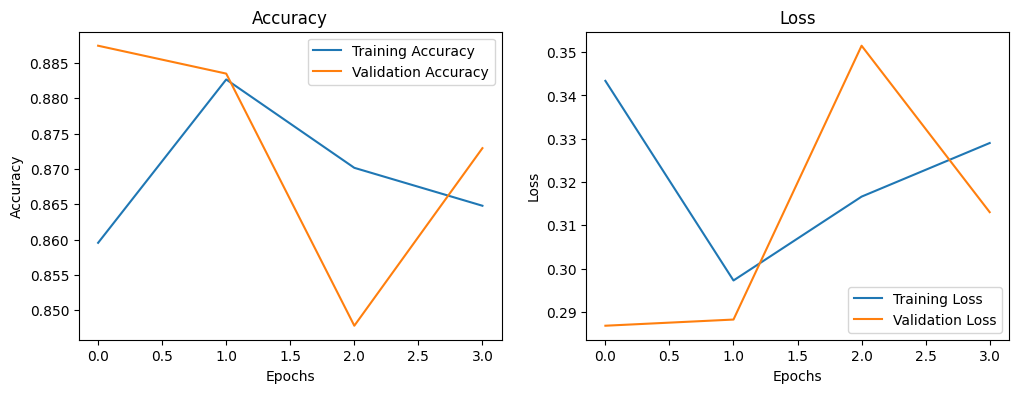

In [5]:
# Plot learning and loss curves
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

# Sample Predictions

Let's make some sample predictions using the trained RNN model to classify the sentiment of a few reviews outside the dataset.

In [6]:
# Function to predict sentiment of new reviews
def predict_sentiment(review):
    review_cleaned = preprocess_text(review)
    review_seq = tokenizer.texts_to_sequences([review_cleaned])
    review_pad = pad_sequences(review_seq, maxlen=max_len)
    prediction = model.predict(review_pad)
    sentiment = 'Positive' if prediction[0] > 0.5 else 'Negative'
    return sentiment

# Example predictions
reviews = [
    "I love this product! It works perfectly and I am very satisfied.",
    "This is the worst purchase I have ever made. Totally disappointed.",
    "Good quality, but the delivery was delayed.",
    "Great value for money. Highly recommend this product!"
]

for review in reviews:
    print(f'Review: "{review}"')
    print(f'Predicted Sentiment: {predict_sentiment(review)}\n')

Review: "I love this product! It works perfectly and I am very satisfied."
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicted Sentiment: Positive

Review: "This is the worst purchase I have ever made. Totally disappointed."
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted Sentiment: Negative

Review: "Good quality, but the delivery was delayed."
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted Sentiment: Positive

Review: "Great value for money. Highly recommend this product!"
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted Sentiment: Positive



# Conclusion

In this case study, we developed and evaluated a Recurrent Neural Network (RNN) model for sentiment analysis on Amazon product reviews. Our goal was to accurately classify reviews as either positive or negative, leveraging the textual content provided by customers.

### Insights

- **Model Performance**: The RNN model demonstrated strong performance with an overall accuracy of approximately 88.61% on the test set. The classification report showed a weighted average precision of 88%, recall of 89%, and an F1-score of 88%, indicating the model's effectiveness in correctly identifying sentiments from the reviews.

- **Class-Specific Metrics**: The model performed exceptionally well in predicting positive reviews, achieving a high precision of 91% and a recall of 95%. However, it showed some limitations in identifying negative reviews, with a precision of 79% and a recall of 65%. This suggests that the model is more likely to classify reviews as positive, which may require further tuning.

- **Learning and Loss Curves**: The learning curves indicate that the model learned effectively during training, with accuracy stabilizing around 88%. The validation loss also decreased initially but plateaued, suggesting that the model reached its optimal performance with the current architecture and dataset.

- **External Review Testing**: When tested on new reviews, the model correctly identified both positive and negative sentiments, showing its ability to generalize beyond the training data. However, the model's performance on reviews with mixed sentiments or nuanced language may need further refinement.

### Recommendations

- **Model Tuning**: To improve the classification of negative reviews, consider experimenting with different RNN architectures, such as GRU or LSTM, and adjusting hyperparameters like learning rate, dropout rates, and the number of units in the layers.

- **Data Balancing**: Since the model performs better on positive reviews, further analysis could involve balancing the dataset or using techniques like SMOTE to generate more representative negative samples, which could enhance the model's ability to detect negative sentiments.

- **Advanced Text Processing**: Implementing more sophisticated text preprocessing techniques, such as lemmatization, n-grams, or even incorporating pre-trained word embeddings like GloVe or Word2Vec, could help the model better understand the nuances of the language used in the reviews.

- **Model Deployment**: Preparing the model for deployment by evaluating it on a broader range of review data, including those with mixed sentiments, and integrating it into real-time applications for sentiment analysis would be beneficial for practical use cases in e-commerce and customer feedback analysis.

### Final Thoughts

- The results underscore the potential of RNNs in sentiment analysis tasks, particularly in extracting meaningful insights from customer reviews. This approach has practical implications for businesses looking to understand customer feedback at scale and improve their products or services based on sentiment analysis.

- Future work could involve further refining the model, exploring other architectures, and applying the model to different datasets or domains to enhance its versatility and accuracy.

## Acknowledgements

- **Data Source**: Amazon Product Reviews Dataset from Kaggle.

- **Libraries**: Utilized TensorFlow, Keras, numpy, matplotlib, nltk, and scikit-learn for data analysis, visualization, and modeling.

## Contact Information

- For further inquiries or collaborations, please contact [ahmadbinsadiq@gmail.com](mailto:ahmadbinsadiq@gmail.com).

## About the Author

- **Name**: Ahmad Bin Sadiq
- **Email**: ahmadbinsadiq@gmail.com
- **LinkedIn**: [Ahmad Bin Sadiq](https://www.linkedin.com/in/ahmadbinsadiq/)

---